In [1]:
# Below analysis focuses on Salaries in Data Science field

# It is based on responses from over 600 tested data-based professionals from different countries
# Through this analysis I wanted to show:
# - who are the respondents - what is their job title, what seniority are they, what is the size of company they work in
# - what are the salaries - how the distribution looks like, how they changed through years, how they depend on seniority,
#   is there a difference in salaries between remote and stationary employees?
#   In the last part I wanted to check if there are correlations between numerical data

# In the end of analysis I have added summary of all results of this analysis

In [2]:
# importing necessary libraries

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
from scipy.stats import iqr
import math

In [6]:
# importing the csv file

In [7]:
df = pd.read_csv("ds_salaries.csv")

In [8]:
# Let's check the structure

In [9]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
# and some info on the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [12]:
# checking for null values

In [13]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
# Dropping unnecessary column 

In [15]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [16]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
# Let's start with answering who are our respondents

In [18]:
# Let's check distribution of job titles

In [19]:
df["job_title"].nunique()

50

In [20]:
# As there are 50 different job titles we will check only top 10

<AxesSubplot:title={'center':'10 most common job titles'}>

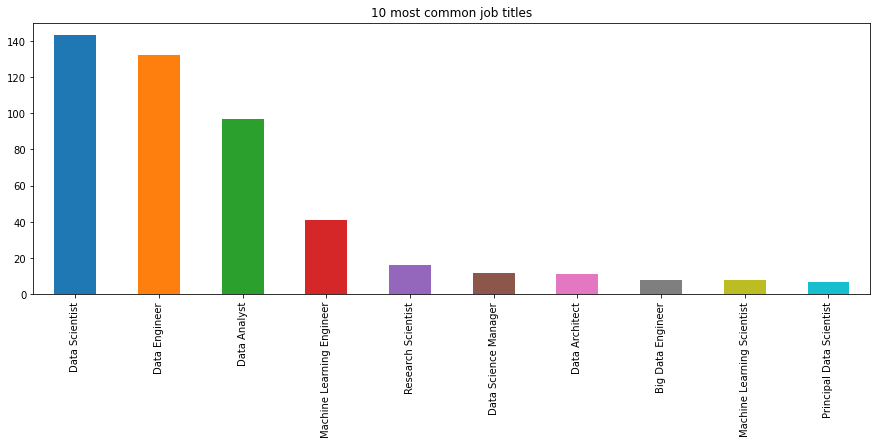

In [21]:
df["job_title"].value_counts().head(10).plot(
    kind="bar",
    figsize=(15,5),
    color=sns.color_palette("tab10"),
    title="10 most common job titles")

In [22]:
#Let's discover seniority of the respondents

<AxesSubplot:title={'center':'Seniority level among respondents'}>

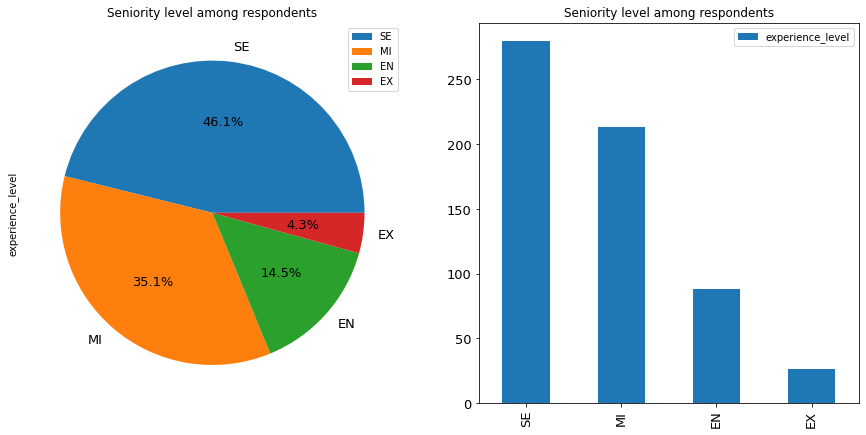

In [23]:
plt.subplot(1, 2 ,1)
df["experience_level"].value_counts().plot(
    kind="pie",
    figsize=(15,7),
    title="Seniority level among respondents",
    legend=1,
    autopct='%1.1f%%',
    fontsize=13
)
plt.subplot(1, 2, 2)
df["experience_level"].value_counts().plot(
    kind="bar",
    figsize=(15,7),
    title="Seniority level among respondents",
    legend=1,
    fontsize=13)

In [24]:
# Below we can see quick graph showing number of respondents and their employment type

<AxesSubplot:title={'center':'Number of respondents per employment type'}>

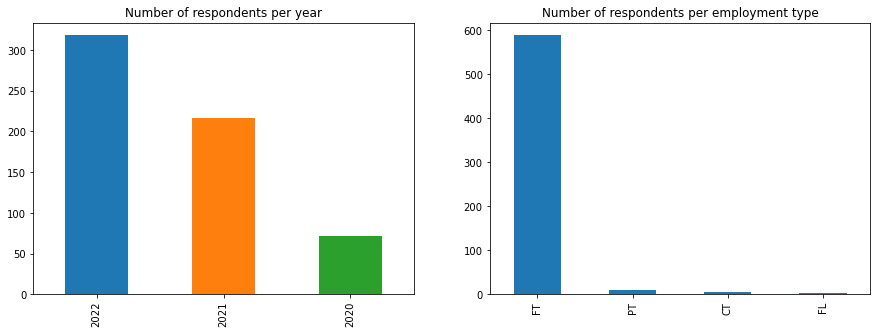

In [25]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
df["work_year"].value_counts().plot(
    kind="bar",
    figsize=(15,5),
    color=sns.color_palette("tab10"),
    title="Number of respondents per year")

plt.subplot(1,2,2)
df["employment_type"].value_counts().plot(
    kind="bar", title="Number of respondents per employment type")

In [26]:
# And let's see what company sizes are most common

<AxesSubplot:ylabel='company_size'>

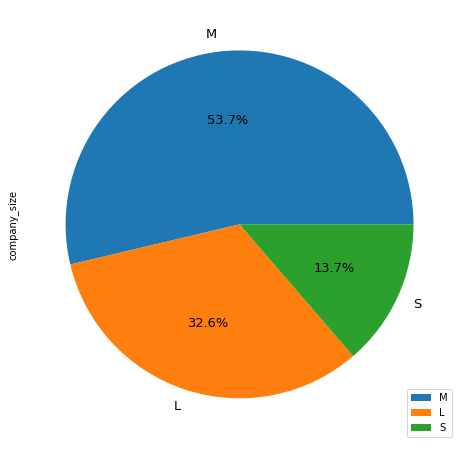

In [27]:
plt.figure(figsize=(20,8))
df["company_size"].value_counts().plot(
    kind="pie",
    figsize=(20,8),
    legend=1,
    autopct='%1.1f%%',
    fontsize=13)

In [28]:
# We know seniority, we know salaries, let's see where top 10 of our tested are coming from

<AxesSubplot:title={'center':"Top 10 respondents' countries"}, ylabel='company_location'>

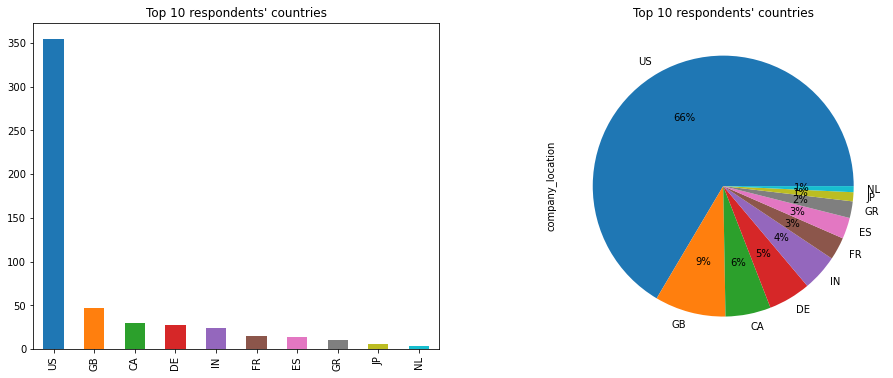

In [29]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
df["company_location"].value_counts().head(10).plot(
    kind="bar", 
    color=sns.color_palette("tab10"),
    title="Top 10 respondents' countries")
plt.subplot(1,2,2)
df["company_location"].value_counts().head(10).plot(
    kind="pie",
    title="Top 10 respondents' countries",
    autopct='%.0f%%')

In [30]:
# SALARY ANALYSIS

In [31]:
# Let's have a look at most important numerical values in this distribution

In [32]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [33]:
# Let's see how salary distribution looks like
# As we can see below, it's positively skewed distribution with few outliers. We will have a deeper look into it further
# in the analysis

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

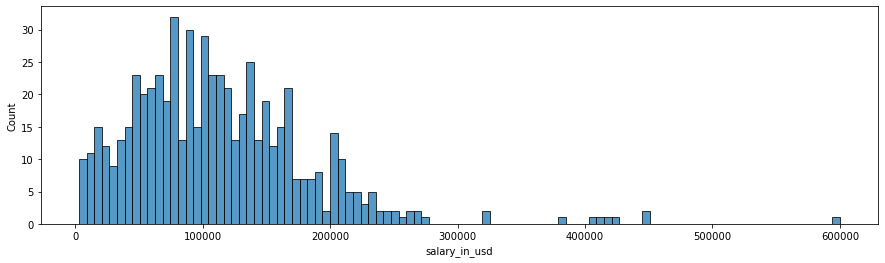

In [34]:
plt.figure(figsize=(15,4))
sns.histplot(df["salary_in_usd"], palette="light:m_r", bins=100)

In [35]:
# Mean value for salaries in USD including outliers
df["salary_in_usd"].mean()

112297.86985172982

In [36]:
# as we can see, there are few very distant values in USD salary - let's take a closer look into who's messing with our data

In [37]:
df[df["salary_in_usd"] > 350000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
97,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
157,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
225,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
252,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
519,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
523,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L


In [38]:
# For the purposes of further analysis, we will remove outliers

In [39]:
Q1 = np.quantile(df["salary_in_usd"], [0.25])
Q3 = np.quantile(df["salary_in_usd"], [0.75])
IQR = Q3-Q1
print(IQR)

[87274.]


In [40]:
#quicker way
iqr(df["salary_in_usd"])

87274.0

In [41]:
# "higher fence" is a border dividing values from outliers

In [42]:
higher_fence = Q3 + 1.5*IQR
print(higher_fence)

[280911.]


In [43]:
#specifying outliers as datapoints behind fence value

In [44]:
outliers = df[(df["salary_in_usd"] > 280911)]

In [45]:
df2 = df[df["salary_in_usd"] < 280911]

In [46]:
#comparing shapes to confirm removal

In [47]:
df.shape

(607, 11)

In [48]:
df2.shape

(597, 11)

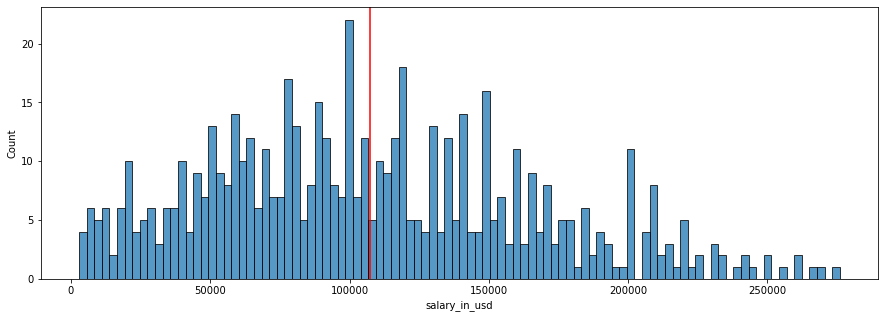

In [49]:
# Distplot with removed outliers and marked mean salary in USD
plt.figure(figsize=(15,5))
sns.histplot(df2["salary_in_usd"], palette="light:m_r", bins=100)
plt.axvline(x=df2["salary_in_usd"].mean(), color="red")

In [50]:
df2["salary_in_usd"].mean()

107168.85594639866

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

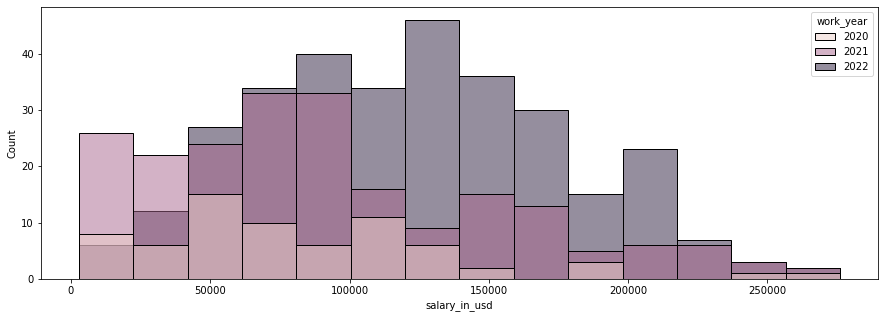

In [51]:
# Let's use histplot to see how salaries changed through these years
plt.figure(figsize=(15,5))
sns.histplot(x=df2["salary_in_usd"], hue=df2["work_year"], label="inline label")

In [52]:
# Let's move to a bit more complicated plots - bar plot seen below shows us salary in USD through three tested years,
# Added hue to visualise how salaries depend on remote work (0 - statnionary, 50 - half remote, 100 - fully remote)

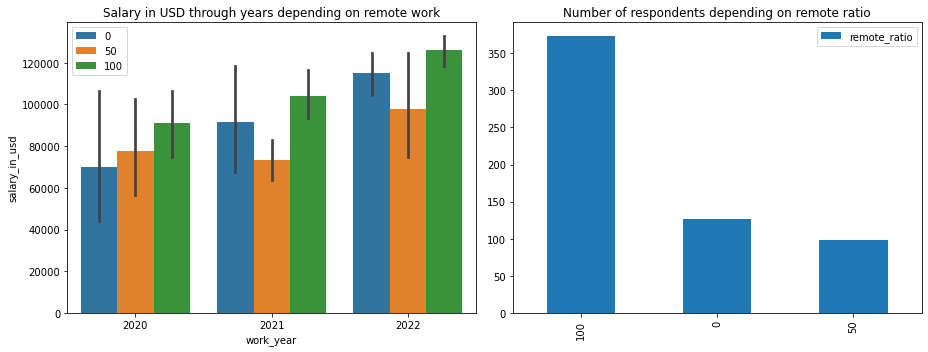

In [53]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(x=df2["work_year"], y=df2["salary_in_usd"], hue=df2["remote_ratio"]).set(title="Salary in USD through years depending on remote work")
plt.legend(loc='best', ncol=1)
plt.subplot(1,2,2)
df2["remote_ratio"].value_counts().plot(kind="bar", title="Number of respondents depending on remote ratio")
plt.legend(loc='best', ncol=1)
plt.tight_layout()

In [54]:
# Now let's see how salaries changed through years depending on experience level
# Below shown on two different graphs where we could easily compare between years and seniority

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

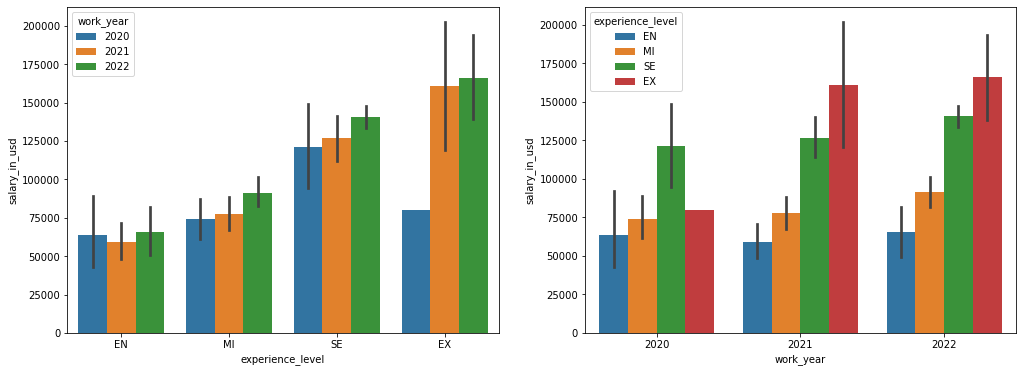

In [55]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.barplot(x=df2["experience_level"], 
            y=df2["salary_in_usd"], hue=df2["work_year"], order=["EN", "MI", "SE", "EX"])
plt.subplot(1,2,2)
sns.barplot(x=df2["work_year"], y=df2["salary_in_usd"], hue=df2["experience_level"], hue_order=["EN", "MI", "SE", "EX"])

In [56]:
# Below graphs divided for each seniority

In [57]:
entry = df2[df2["experience_level"] == "EN"]
mid = df2[df2["experience_level"] == "MI"]
senior = df2[df2["experience_level"] == "SE"]
executive = df2[df2["experience_level"] == "EX"]

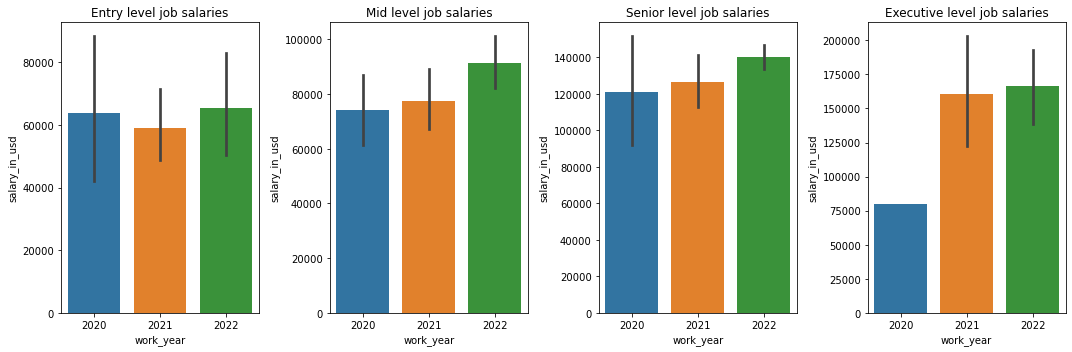

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.barplot(x=entry["work_year"], y=entry["salary_in_usd"]).set(title="Entry level job salaries")
plt.subplot(1,4,2)
sns.barplot(x=mid["work_year"], y=mid["salary_in_usd"]).set(title="Mid level job salaries")
plt.subplot(1,4,3)
sns.barplot(x=senior["work_year"], y=senior["salary_in_usd"]).set(title="Senior level job salaries")
plt.subplot(1,4,4)
sns.barplot(x=executive["work_year"], y=executive["salary_in_usd"]).set(title="Executive level job salaries")
plt.tight_layout()

In [59]:
# Belowe we can see boxplots showing us range of salaries, divided by seniority

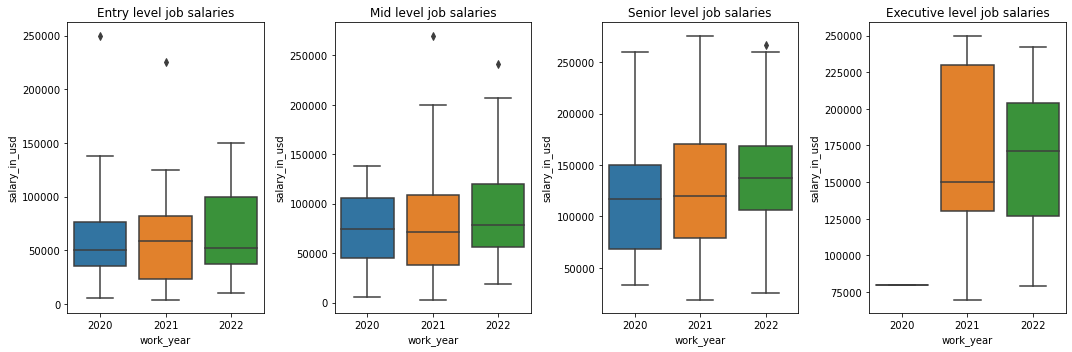

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(x=entry["work_year"], y=entry["salary_in_usd"]).set(title="Entry level job salaries")
plt.subplot(1,4,2)
sns.boxplot(x=mid["work_year"], y=mid["salary_in_usd"]).set(title="Mid level job salaries")
plt.subplot(1,4,3)
sns.boxplot(x=senior["work_year"], y=senior["salary_in_usd"]).set(title="Senior level job salaries")
plt.subplot(1,4,4)
sns.boxplot(x=executive["work_year"], y=executive["salary_in_usd"]).set(title="Executive level job salaries")
plt.tight_layout()

In [ ]:
# Probability
# Let's assume our friend Anna asks what is the chance, that if she joined data science field, she would earn
# 50000 USD or less.

In [62]:
import scipy

In [63]:
from scipy import stats
from scipy.stats import norm

In [64]:
mean = df2['salary_in_usd'].mean()

In [65]:
std = df2['salary_in_usd'].std()

In [79]:
Anna = 50000

In [81]:
norm.cdf(Anna, mean, std)

0.16445323394613648

In [ ]:
# The chance of Anna earning 50 000 USD or less is around 16%

In [73]:
# Correlations
# Let's check the correlations between numerical values available

In [74]:
df2["salary_in_usd"].corr(df2["remote_ratio"])

0.13402618140780587

In [75]:
df2["salary_in_usd"].corr(df2["work_year"])

0.2668832179172304

In [ ]:
# As we can see above, there is a small correlation between salary and work year.

In [76]:
# SUMMARY

In [77]:
# As we could see, most of respondents are:
# - coming from US (over 60%)
# - 3 most common job titles are - "Data scientist", "Data Engineer", "Data Analyst"
# - Seniority comes as follows : senior (~46%), mid (~35%), entry (~14%), executive (~4%)
# - Most respondents are employed full-time
# - Company size that respondents work in - medium (~53%), large (~32%), small (~13%)
# - Mean salary for all of respondents is 107k$ per year
# - Remote employees are the biggest part of respondents and are earning more than stationary/mixed respondents